In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [138]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100,1)

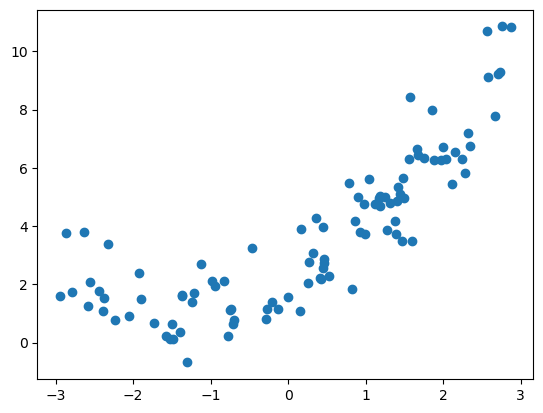

In [139]:
plt.scatter(X,y)
plt.show()

In [140]:
from sklearn.model_selection import train_test_split


In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [142]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [143]:
reg.fit(X_train,y_train)

LinearRegression()

In [144]:
reg.coef_

array([[1.40205281]])

In [145]:
y_pred=reg.predict(X_test)

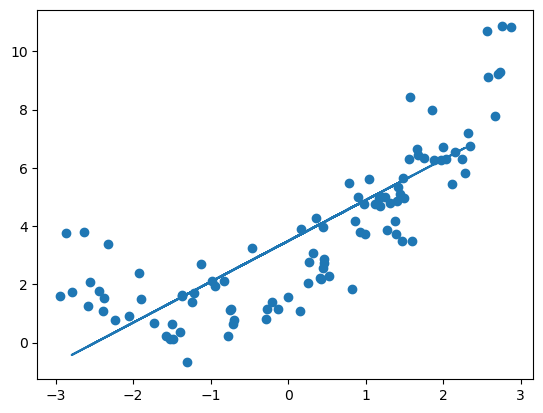

In [146]:
plt.scatter(X,y)
plt.plot(X_test,y_pred)
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error,r2_score

In [148]:
score=r2_score(y_test,y_pred)

In [149]:
score

0.5805093036313382

In [150]:
mse=mean_squared_error(y_test,y_pred)

In [151]:
mse

1.5018141296734513

In [152]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [154]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [155]:
reg=LinearRegression()
reg.fit(X_train_poly,y_train)
y_pred=reg.predict(X_test_poly)

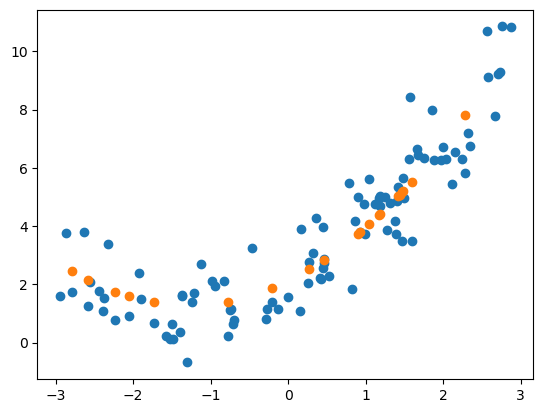

In [156]:
plt.scatter(X,y)
plt.scatter(X_test,y_pred)
plt.show()

In [157]:
from sklearn.metrics import mean_squared_error,r2_score

In [158]:
score=r2_score(y_test,y_pred)

In [159]:
score

0.7120425616046027

In [160]:
mse=mean_squared_error(y_test,y_pred)

In [161]:
mse

1.0309133276861089

In [162]:
reg.coef_

array([[0.        , 1.31783331, 0.51612852]])

## Pipeline

In [163]:
from sklearn.pipeline import Pipeline

In [164]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

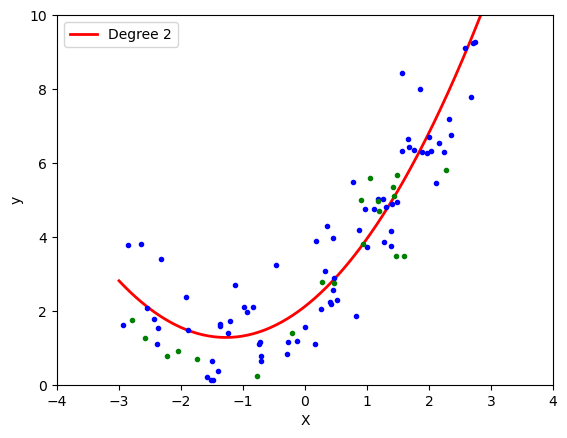

In [172]:
poly_regression(2)